In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
%matplotlib inline

In [2]:
x = np.linspace(0,20, 100)
y = sp.jv(1,x)

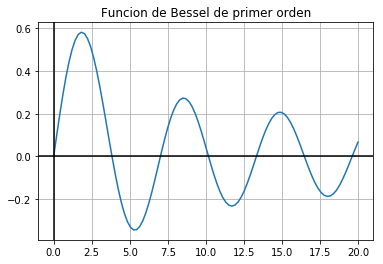

In [3]:
plt.title("Funcion de Bessel de primer orden")
plt.plot(x,y)
plt.grid(True)
plt.axhline(y=0, color="black")
plt.axvline(x=0, color="black")

# Buscando ceros por barrido

In [4]:
delta_x = 0.3
precision = 0.2
min_x = 1.0
max_x = 20.0

x = min_x
value = sp.jv(1,x)
ceros_barrido = []
while x < max_x:
    value_x = sp.jv(1,x)
    value_delta_x = sp.jv(1,x+delta_x)
    if ((value_x * value_delta_x) < 0) and (np.abs(sp.jv(1,x))<precision):
        ceros_barrido.append(x)
    x = x + delta_x
print(ceros_barrido, sp.jv(1,ceros_barrido))

[3.6999999999999993, 6.999999999999997, 10.000000000000002, 13.30000000000001, 16.300000000000015, 19.600000000000023] [ 0.05383399 -0.00468282  0.04347275 -0.00517748  0.03353508 -0.00285657]


# Buscando ceros por biseccion

In [5]:
def f(x):
    return sp.jv(1,x)

def biseccion(f,a,b):
    itera = 0
    val_a = f(a)
    val_b = f(b)
    mid = 0.5*(a+b)
    val_mid = f(mid)
    precision = 1E-4
    while np.abs(val_mid) > precision:
        if (val_a * val_mid) > 0:
            a = mid
        else:
            b = mid
        val_a = f(a)
        val_b = f(b)
        mid = 0.5*(a+b)
        val_mid = f(mid)
        itera += 1
    return mid, itera
        
for c in ceros_barrido:
    cero, itera = biseccion(f, c-0.5, c+0.5)
    print('Cero en {}. La funcion vale: {}. Iteraciones: {}'.format(cero, sp.jv(1,cero), itera))


Cero en 3.8318359374999993. La funcion vale: -5.234466031372768e-05. Iteraciones: 9
Cero en 7.015624999999997. La funcion vale: 1.1503460701482886e-05. Iteraciones: 5
Cero en 10.173828125000002. La funcion vale: -8.988965073657894e-05. Iteraciones: 8
Cero en 13.32343750000001. La funcion vale: -5.555909265263364e-05. Iteraciones: 6
Cero en 16.470898437500015. La funcion vale: -5.272824723450017e-05. Iteraciones: 9
Cero en 19.615625000000023. La funcion vale: -4.2046932972201465e-05. Iteraciones: 5


# Buscando ceros por Newton-Raphson

In [6]:
def f(x):
    return sp.jv(1,x)

def f_prime(x):
    h = 1E-4
    return (f(x+h)-f(x))/h

def newton_raphson(f,a):
    itera = 0
    precision = 1E-4
    while np.abs(f(a)) > precision:
        a = a - f(a)/f_prime(a)
        itera += 1
    return a, itera
        
for c in ceros_barrido:
    cero, itera = newton_raphson(f, c-0.5)
    print('Cero en {}. La funcion vale: {}. Iteraciones: {}'.format(cero, sp.jv(1,cero), itera))


Cero en 3.8316585136436783. La funcion vale: 1.911369532937799e-05. Iteraciones: 2
Cero en 7.015530128291728. La funcion vale: -1.6969070362312608e-05. Iteraciones: 2
Cero en 10.173468116915883. La funcion vale: 4.531354223996113e-09. Iteraciones: 3
Cero en 13.323606836525345. La funcion vale: -1.8582398777206714e-05. Iteraciones: 2
Cero en 16.470630038789412. La funcion vale: 2.3749166172422416e-09. Iteraciones: 3
Cero en 19.615785527958646. La funcion vale: -1.314150145414844e-05. Iteraciones: 2
